In [3]:
# Importing Pandas to handle the data in the form of rows and columns
import pandas as pd 

# Importing NumPy for numerical and mathematical functions
import numpy as np

# Reading the dataset in the form of .csv file using Pandas
data = pd.read_csv('diabetes.csv')

In [4]:
# Overview of the top 10 rows
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# Summary of contents of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Importing Seaborn for statistical plots
import seaborn as sb
sb.set(color_codes = True)

# Importing MatPlotLib for data visualisation
import matplotlib.pyplot as mp
%matplotlib inline

In [7]:
# Checking for any missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Checking for duplicate values
data.duplicated().sum()

0

In [9]:
# Analyzing the mean, standard deviation, percentiles, etc
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Outcome
0    500
1    268
dtype: int64

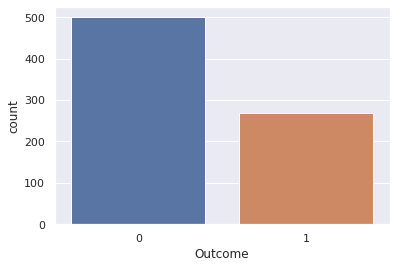

In [10]:
# Analyzing the count of each class in Outcome
sb.countplot(x = data['Outcome'])
data.groupby('Outcome').size()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

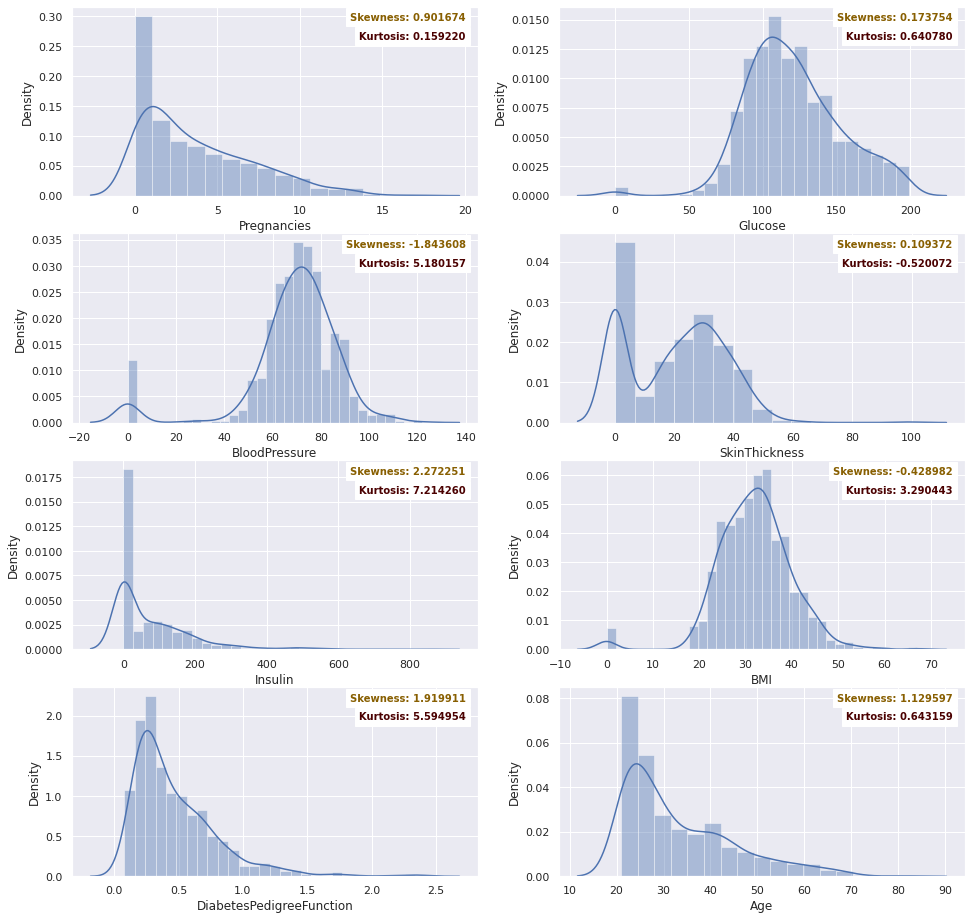

In [12]:
# Distribution Plot
fig, ax2 = mp.subplots(4, 2, figsize=(16, 16))
sb.distplot(data['Pregnancies'], ax=ax2[0][0])
sb.distplot(data['Glucose'],ax=ax2[0][1])
sb.distplot(data['BloodPressure'],ax=ax2[1][0])
sb.distplot(data['SkinThickness'],ax=ax2[1][1])
sb.distplot(data['Insulin'],ax=ax2[2][0])
sb.distplot(data['BMI'],ax=ax2[2][1])
sb.distplot(data['DiabetesPedigreeFunction'],ax=ax2[3][0])
sb.distplot(data['Age'],ax=ax2[3][1])

# Calculating skewness and kurtosis for each attribute
for i, ax in enumerate(ax2.reshape(-1)):
  ax.text(x=0.97, y=0.97, transform=ax.transAxes,\
          s="Skewness: %f" % data.iloc[:,i].skew(),\
          fontweight='demibold', fontsize=10, verticalalignment='top',\
          horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:poo brown')
  ax.text(x=0.97, y=0.87, transform=ax.transAxes,\
          s="Kurtosis: %f" % data.iloc[:,i].kurt(),\
          fontweight='demibold', fontsize=10, verticalalignment='top',\
          horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:dried blood')

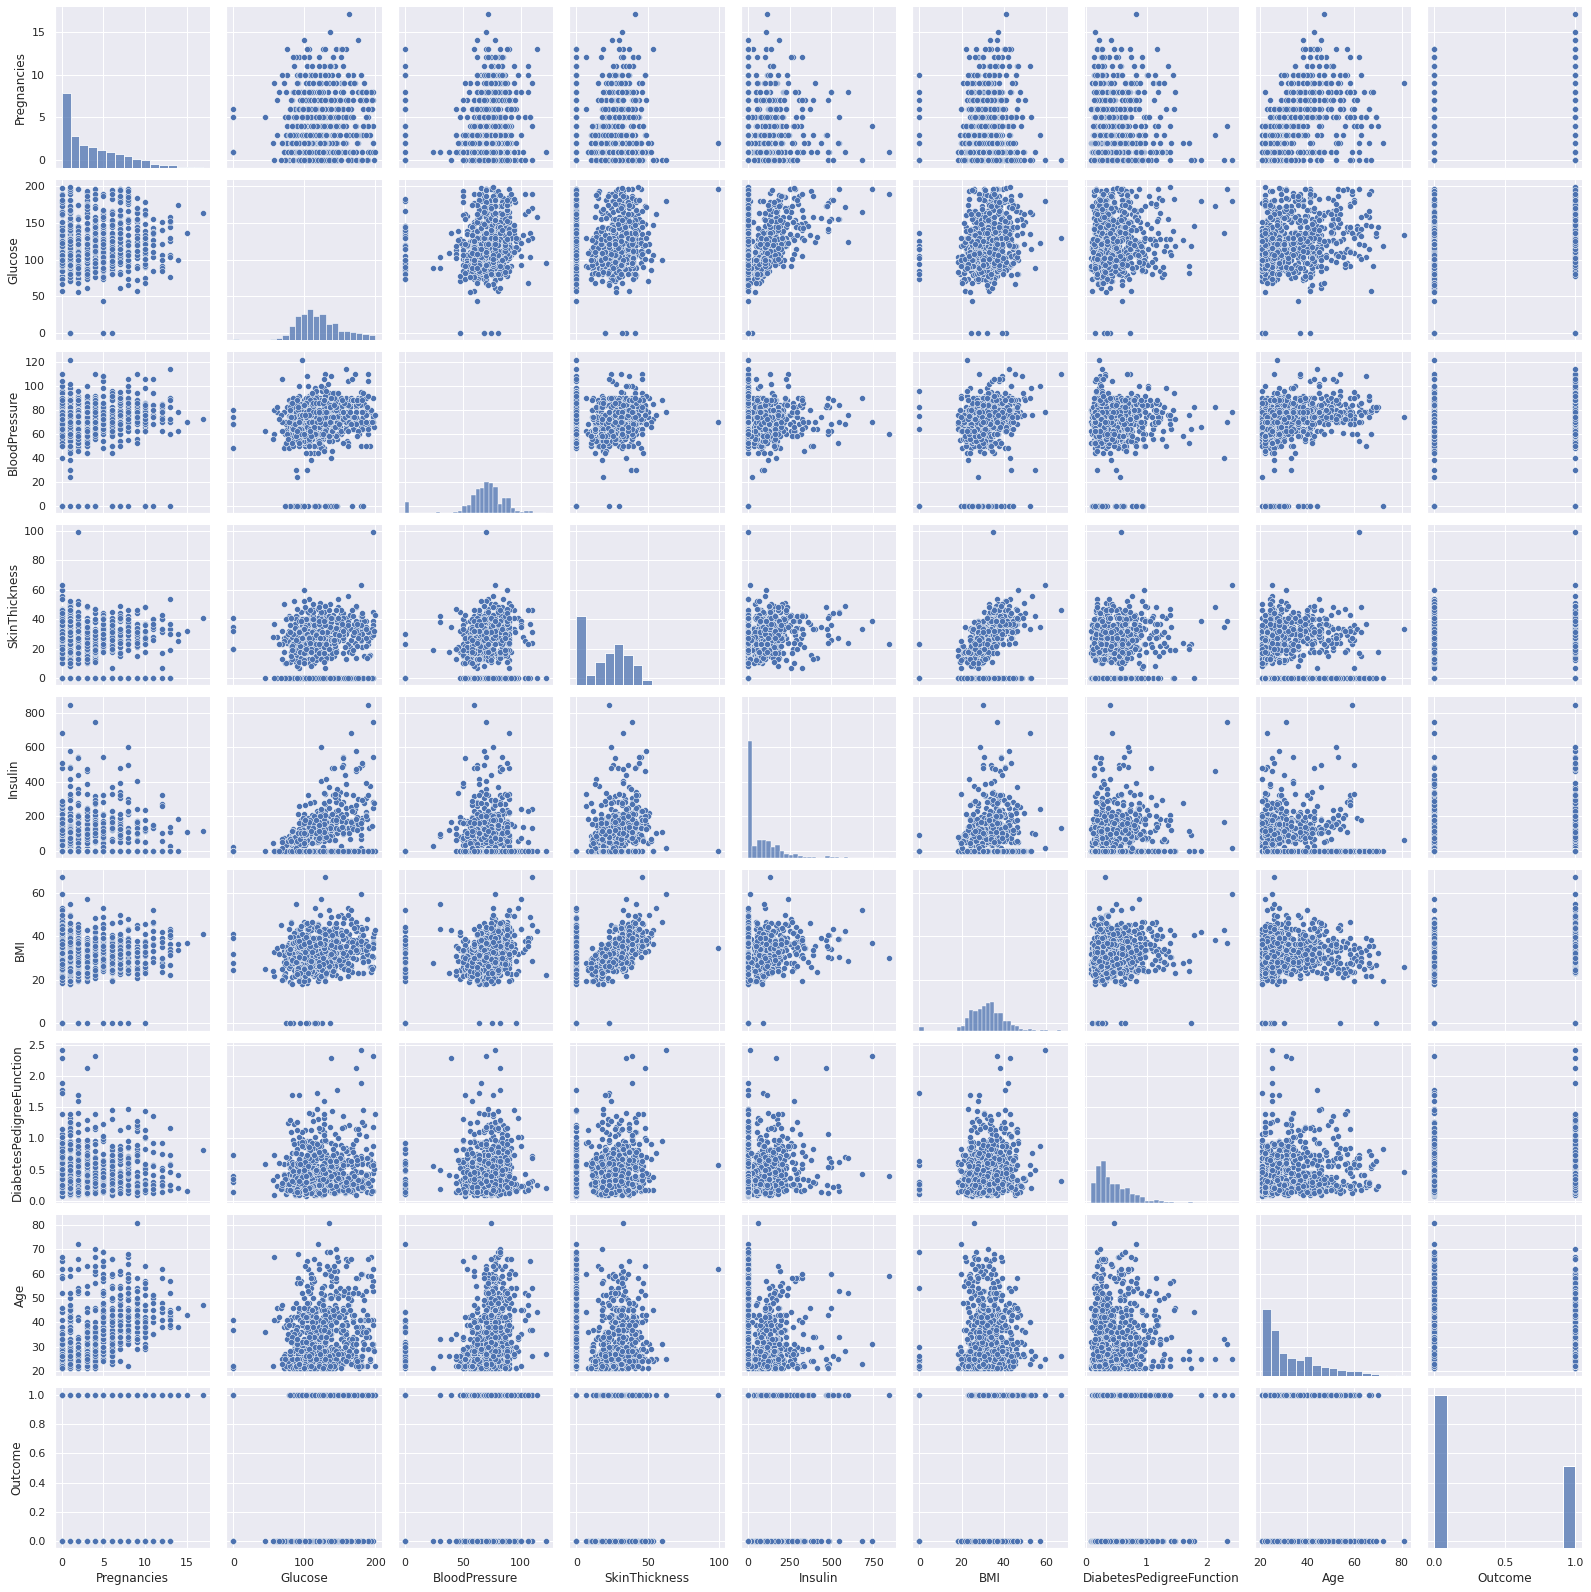

In [ ]:
# Pair Plot
sb.pairplot(data)

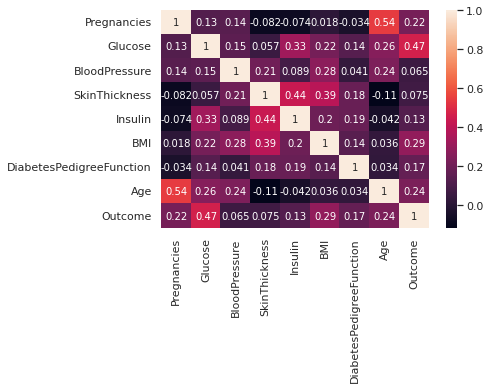

In [ ]:
# Correlation Heatmap
cor = data.corr()
sb.heatmap(cor, annot = True)

In [ ]:
# Replacing 0 values with NaN for columns that shouldn't have 0 values
replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data[replace] = data[replace].replace(0,np.nan)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# 0 values in these columns have been replaced with NaN
data.isnull().sum()[replace]

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,NaN,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,NaN,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,NaN,NaN,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [ ]:
# Imputing the missing values with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.384856,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.050721,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.273913,0.269231,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


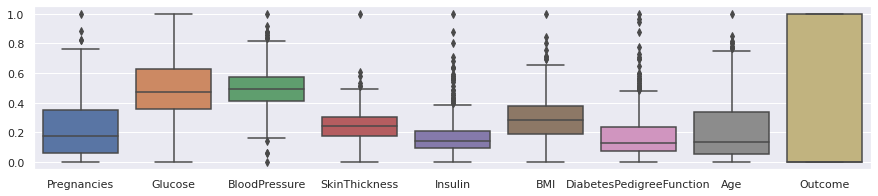

In [ ]:
# Box Plot
fig = mp.figure(figsize=(15,3))

sb.boxplot(data = data)

# for i in np.arange(1,7):
#     data3=mp.subplot(1,7,i,title=data.columns[i])
#     sb.boxplot(data[data.columns[i]])

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',\
            'BMI', 'DiabetesPedigreeFunction', 'Age']

for f in features:
  for x in [f]:
    q75, q25 = np.percentile(data.loc[:, x], [75, 25])
    intr_qr = q75 - q25
 
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [ ]:
data.isnull().sum()

Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness                6
Insulin                     30
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [ ]:
# Replacing NaN values with median values
for f in features:
  for i in [f]:
    data.loc[data.loc[:,i].isnull(), i] = data.loc[:,i].median()

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.384856,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.050721,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.273913,0.269231,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.118702,0.200000,1.0
5,0.294118,0.464516,0.510204,0.173913,0.137500,0.151329,0.052519,0.150000,0.0
6,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333,1.0
7,0.588235,0.458065,0.489796,0.269565,0.187019,0.349693,0.023911,0.133333,0.0
8,0.117647,0.987097,0.469388,0.413043,0.135817,0.251534,0.034159,0.533333,1.0
9,0.470588,0.522581,0.734694,0.273913,0.330769,0.318609,0.065756,0.550000,1.0


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# For handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# For splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split

# Gaussian Naive Bayes library
from sklearn.naive_bayes import GaussianNB

#  Model Evaluation Metrics
from sklearn import metrics

# Classification Report from metrics
from sklearn.metrics import classification_report

In [ ]:
# Prepare the training and testing sets
X = data.loc[:,data.columns != 'Outcome']
Y = data.loc[:,data.columns == 'Outcome']

# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
columns = X_train.columns




In [ ]:
# Managing Imbalance Classes with SMOTE
smote = SMOTE(random_state = 42)

# Using SMOTE to oversample our training data
OV_data_X, OV_data_Y = smote.fit_resample(X_train, Y_train)
OV_data_X = pd.DataFrame(data = OV_data_X, columns = columns)
OV_data_Y = pd.DataFrame(OV_data_Y, columns = ['Outcome'])

In [ ]:
# Results after oversampling
print('Length of oversampled data is: ',len(OV_data_X))
print('Number of Outcome 0: ', len(OV_data_Y[OV_data_Y['Outcome'] == 0]))
print('Number of Outcome 1: ', len(OV_data_Y[OV_data_Y['Outcome'] == 1]))

Length of oversampled data is:  708
Number of Outcome 0:  354
Number of Outcome 1:  354


In [ ]:
# Creating a Gaussian Naive Bayes Model
model = GaussianNB()

# Training the model using the training sets
model.fit(X_train, Y_train)

# Testing the model using the testing sets
predictions = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Checking the accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, predictions))

Accuracy: 0.8138528138528138


In [ ]:
# Classification Report
print (metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       146
         1.0       0.76      0.73      0.74        85

    accuracy                           0.81       231
   macro avg       0.80      0.80      0.80       231
weighted avg       0.81      0.81      0.81       231



In [ ]:
# Confusion Matrix
print (metrics.confusion_matrix(Y_test, predictions))

[[126  20]
 [ 23  62]]


In [ ]:
# List of overall scores
print('Accuracy:',metrics.accuracy_score(Y_test, predictions))
print('Precision:',metrics.precision_score(Y_test, predictions))
print('Recall:',metrics.recall_score(Y_test, predictions))
print('F1-score:',metrics.f1_score(Y_test, predictions))

Accuracy: 0.8138528138528138
Precision: 0.7560975609756098
Recall: 0.7294117647058823
F-score: 0.7425149700598803
